<div style="border: 2px solid black; border-radius: 10px; padding: 15px; text-align: left; font-family: Arial, sans-serif; width: 80%; max-width: 700px; margin: auto;">
  <h1>📊 Analyzing Heart Attack Risk</h1>
  
  <h4>Introduction</h4>
  <ul>
    <li>This notebook aims to analyze and predict the heart attck risk using  machine learning models. We will preprocess the data, fill missing values, and evaluate model performance.</li>
 
  </ul>
​
</div>

<div style="font-size:40px; color:blue;">
<div style="background-color:#f0f0f0; padding:10px;">
Import Necessary Libraries
</div>


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.model_selection import KFold


<div style="font-size:40px; color:blue;">
<div style="background-color:#f0f0f0; padding:10px;">
Load Dataset
</div>


In [2]:
train = pd.read_csv('/kaggle/input/heart-attack-risk-analysis/train.csv')
test= pd.read_csv('/kaggle/input/heart-attack-risk-analysis/test.csv')





<div style="font-size:40px; color:blue;">
<div style="background-color:#f0f0f0; padding:10px;">
Exploratory Data Analysis(EDA)
</div>


In [3]:
pd.set_option('display.max_columns', None)  # Show all col
train.head(1)     #check dataset first few rows using head command

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diet,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,RDG0550,33,Male,200,129/90,48,0,1,1,1,1,7.80769,Unhealthy,0,1,2,0.138443,184066,30.449815,63,6,7,Argentina,South America,Southern Hemisphere,1


In [4]:
pd.set_option('display.max_columns', None)  # Show all col
test.head(1)     #check dataset first few rows using head command

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diet,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,0,4.168189,Average,0,0,9,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere


In [5]:
train.shape   #check the shape of data having how many rows and columns

(7010, 26)

In [6]:
train['Sex'].value_counts()      #count value of sex column

Sex
Male      4891
Female    2119
Name: count, dtype: int64

In [7]:
  # Show all col    #check dataset first few rows using head command
train.info()     # Display DataFrame summary

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7010 entries, 0 to 7009
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       7010 non-null   object 
 1   Age                              7010 non-null   int64  
 2   Sex                              7010 non-null   object 
 3   Cholesterol                      7010 non-null   int64  
 4   Blood Pressure                   7010 non-null   object 
 5   Heart Rate                       7010 non-null   int64  
 6   Diabetes                         7010 non-null   int64  
 7   Family History                   7010 non-null   int64  
 8   Smoking                          7010 non-null   int64  
 9   Obesity                          7010 non-null   int64  
 10  Alcohol Consumption              7010 non-null   int64  
 11  Exercise Hours Per Week          7010 non-null   float64
 12  Diet                

In [8]:
train.columns

Index(['Patient ID', 'Age', 'Sex', 'Cholesterol', 'Blood Pressure',
       'Heart Rate', 'Diabetes', 'Family History', 'Smoking', 'Obesity',
       'Alcohol Consumption', 'Exercise Hours Per Week', 'Diet',
       'Previous Heart Problems', 'Medication Use', 'Stress Level',
       'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Country',
       'Continent', 'Hemisphere', 'Heart Attack Risk'],
      dtype='object')

In [9]:
 #check missing vales in data
train.isnull().sum().sort_values(ascending=False)



Patient ID                         0
Age                                0
Hemisphere                         0
Continent                          0
Country                            0
Sleep Hours Per Day                0
Physical Activity Days Per Week    0
Triglycerides                      0
BMI                                0
Income                             0
Sedentary Hours Per Day            0
Stress Level                       0
Medication Use                     0
Previous Heart Problems            0
Diet                               0
Exercise Hours Per Week            0
Alcohol Consumption                0
Obesity                            0
Smoking                            0
Family History                     0
Diabetes                           0
Heart Rate                         0
Blood Pressure                     0
Cholesterol                        0
Sex                                0
Heart Attack Risk                  0
dtype: int64



<div style="font-size:40px; color:blue;">
<div style="background-color:#f0f0f0; padding:10px;">
Data Viualization
</div>


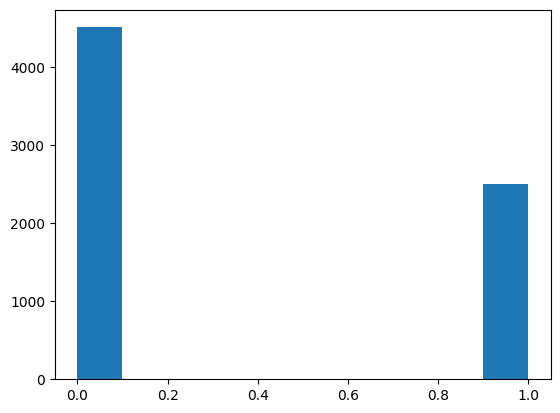

In [10]:

plt.hist(train['Heart Attack Risk'], bins=10 )   #histogram ploat
plt.show()

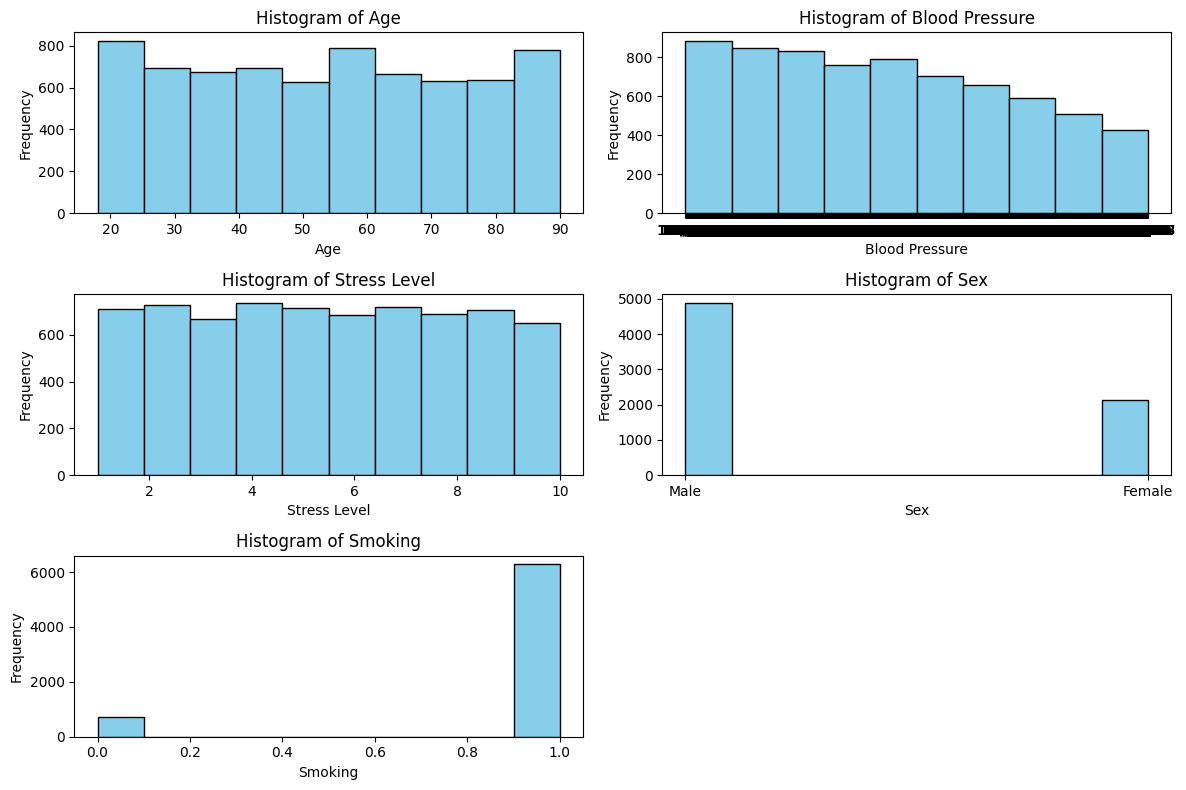

In [11]:
selected_columns = ['Age', 'Blood Pressure', 'Stress Level', 'Sex', 'Smoking']

# Plot histograms for the selected columns
plt.figure(figsize=(12, 8))
for i, column in enumerate(selected_columns):
    plt.subplot(3, 2, i+1)
    plt.hist(train[column].dropna(), bins=10, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()



<div style="font-size:40px; color:blue;">
<div style="background-color:#f0f0f0; padding:10px;">
Preprocess the Data
</div>

Preprocessing refers to the steps or techniques applied to prepare raw data for analysis or modeling. It involves transforming, cleaning, and organizing the data to make it suitable for further analysis. Preprocessing plays a crucial role in data science and machine learning workflows as it helps improve the quality of data and enhances the performance of models.

In [12]:
#encode categorical columns
numerical_cols = train.select_dtypes(include=['number']).columns
categorical_cols = train.select_dtypes(include=['object']).columns
encoder=LabelEncoder()
for cols in categorical_cols:
   train[cols]=encoder.fit_transform(train[cols])
   test[cols]=encoder.fit_transform(test[cols])





<div style="font-size:40px; color:blue;">
<div style="background-color:#f0f0f0; padding:10px;">
Spliting the Data
</div>


In [13]:
# Splitting the data into features and target variable
X = train.drop('Heart Attack Risk', axis=1)
y = train['Heart Attack Risk']

# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

<div style="font-size:40px; color:blue;">
<div style="background-color:#f0f0f0; padding:10px;">
Feature Scalling
</div>


In [14]:
scaler = StandardScaler()  # Change to MinMaxScaler() if you prefer normalization

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the validation and test data
X_val_scaled = scaler.transform(X_val)
test_df_scaled = scaler.transform(test)



<div style="font-size:40px; color:blue;">
<div style="background-color:#f0f0f0; padding:10px;">
Model Building and Tuning
</div>


In [15]:

# Define parameter grid
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize and fit GridSearchCV
clf = XGBClassifier(random_state=42)
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=3, n_jobs=-1, scoring='accuracy')
grid_search.fit(X, y)

# Best hyperparameters
grid_search.best_estimator_


/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [20:23:09] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [20:23:09] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [20:23:09] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [20:23:09] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, min_samples_leaf=1, min_samples_split=2,
              missing=nan, monotone_constraints=None, multi_strategy=None,
              n_estimators=10, n_jobs=None, ...)



<div style="font-size:40px; color:blue;">
<div style="background-color:#f0f0f0; padding:10px;">
Evaluate the Model
</div>


In [16]:
# Evaluate the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print("Test set accuracy:", accuracy)

Test set accuracy: 0.6954350927246791



<div style="font-size:40px; color:blue;">
<div style="background-color:#f0f0f0; padding:10px;">
Predict Test Data and Make Submisson
</div>




In [17]:
test_predictions = best_model.predict_proba(test)[:, 1]
# Prepare submission
submission_df = pd.DataFrame({
    'Patient ID': test.index,  # Assuming Patient ID is the index in the test_df
    'Heart Attack Risk': test_predictions
})

# Save the submission file
submission_df.to_csv('submission.csv', index=False)
print("Submission file created successfully!")

Submission file created successfully!



<div style="font-size:40px; color:blue;">
<div style="background-color:#f0f0f0; padding:10px;">
Summary
</div>




1. **Load Data:** Read the dataset from a file.
2. **Preprocess Data:** convert categorical variables to numerical format.
3. **Split Data:** Divide the data into training and testing sets.
4. **Train Model:** Use a machine learning algorithm(XGBclassifier) to fit the model on the training data.
5. **Make Predictions:** Use the trained model to predict outcomes on the test data.
6. **Evaluate Model:** Assess the model's performance using metrics like accuracy.
7. **Create Submission:** Analyze which features are most influential in the model’s predictions.

<div style="border: 2px solid #FFA500; border-radius: 10px; padding: 10px; background-color: #FFF5E6; text-align: center; font-family: Arial, sans-serif; width: 80%; max-width: 600px; margin: auto;">
  <h3 style="color: #FFA500;">👍 <strong>Enjoyed this guide?</strong></h3>
  <p style="color: #333333;">If you found this guide helpful, please consider giving it an upvote! Your support helps us continue to create valuable content and improve our resources.</p>
  <p style="font-size: 16px; color: #FF8C00;">Thank you! 😊</p>
</div>
